In [1]:
from sympy import Symbol, nsolve, solve
import sympy
import mpmath
import numpy as np
import matplotlib.pyplot as plt
import math as m
mpmath.mp.dps = 15
w = Symbol('w')
x = Symbol('x')
y = Symbol('y')
z = Symbol('z')
H = Symbol('H')
OH = Symbol('OH')

In [56]:
Kw = 10.000**(-14)
#Ka1 = 0.00071 #citric acid
#Ka2 = 0.000017
#Ka3 = 0.0000064
Ka1 = .0069 # phosphoric acid
Ka2 = .000000062
Ka3 = .00000000000048

C = .05 #concentration of acid (M)

In [69]:
Hguess = (Ka1*C)**(1/2) # a rough initial guess for the concentration of hydrognium in solution
OHguess = Kw/Hguess
f1 = H*OH - Kw
f2 = x + 2.0*y + 3.0*z + OH - H
f3 = H*x - Ka1*w # w is the concentration of acid with all 3 hydrogen atoms still attached, x is the concentration of acid with one lost hydrogen
f4 = H*y - Ka2*x #y is the concentration of acid with 2 less hydrogen atoms
f5 = H*z - Ka3*y #z is the concentration of acid without all 3 hydrogen atoms 
f6 = w + x + y + z - C
answers = nsolve((f1, f2, f3, f4, f5, f6), (w, x, y, z, H, OH), (1,1,1,1,Hguess,OHguess)) #solve for concentration of w, x, y, z and the concentrations of hydronium and hydroxide 
answers

Matrix([
[  0.0345581366722643],
[  0.0154418013282335],
[ 6.19995021360192e-8],
[1.92720534476029e-18],
[  0.0154419253278854],
[ 6.4758764128601e-13]])

In [70]:
print("the pH of ", C, "M of the acid is ", (-m.log10(answers[4])))

the pH of  0.05 M of the acid is  1.8112985519829656


In [71]:
Hguess = (Ka1*C)**(1/2) # a rough initial guess for the concentration of hydrognium in solution
OHguess = Kw/Hguess
NaOH = C #concentration of NaOH
Hlist = []
pHlist = []

vol1 = 0
vol2 = 3.5 #total volume of NaOH used in titration

NaOHsteps = np.arange(vol1*NaOH,vol2*NaOH,(vol2-vol1)*NaOH/200) #list of the amounts of NaOH used in each step
vollist = np.arange(vol1,vol2,(vol2-vol1)/200) #list of additional volume after the 1L of acid
for i in range(len(NaOHsteps)): #use the same pH calculation method, but modified to add volume, and add NaOH to the equations 
    newC = C/(1+vollist[i])
    f1 = H*OH - Kw
    f2 = x + 2.0*y + 3.0*z + OH - H - NaOHsteps[i]/(1+vollist[i])
    f3 = H*x - Ka1*w
    f4 = H*y - Ka2*x
    f5 = H*z - Ka3*y
    f6 = w + x + y + z - newC
    answers = nsolve((f1, f2, f3, f4, f5, f6), (w, x, y, z, H, OH), (1,1,1,1,Hguess,i))
    Hguess = answers[4] 

    Hlist.append(answers[4]) #save the concentration of hydronium
    pH = -1*m.log10(answers[4]) #calculate pH and add to a list
    pHlist.append(pH)
    
print(len(NaOHsteps),len(vollist))

200 200


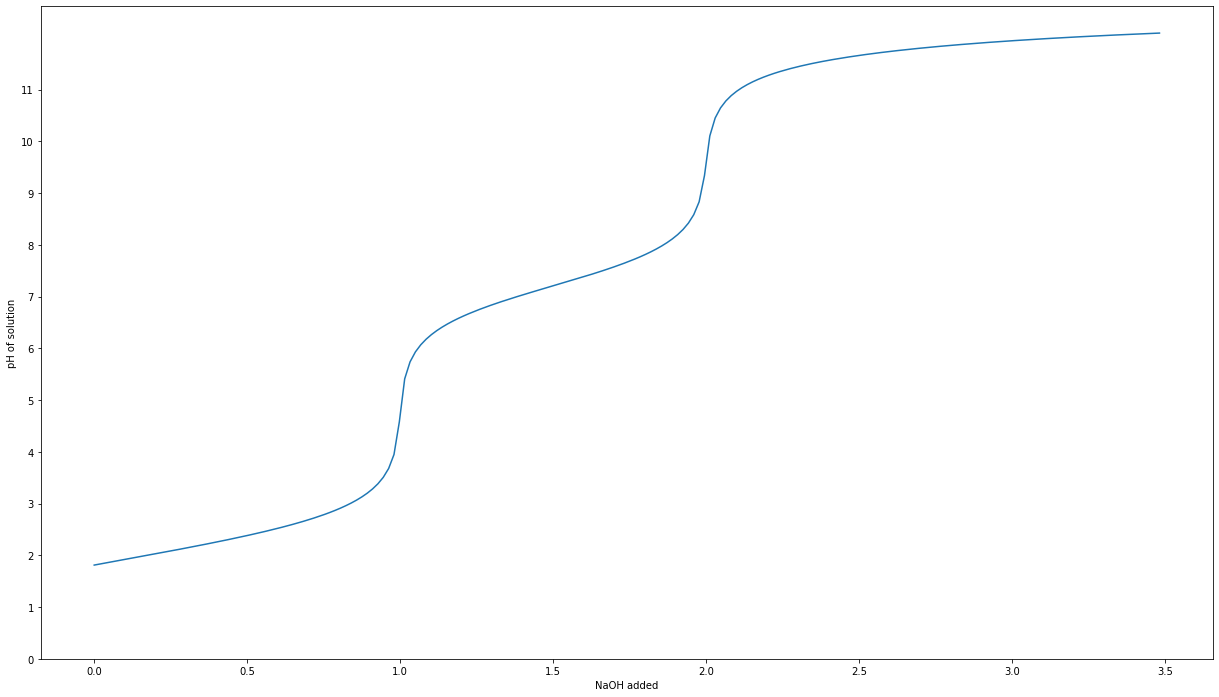

In [72]:
plt.figure(figsize=(21,12))
plt.xlabel("NaOH added")
plt.ylabel("pH of solution")
#plt.title("Titration of citric acid")
plt.plot(vollist,pHlist)
plt.yticks(np.arange(0, 12, 1))
plt.show()